In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, vstack
import astropy.units as u
import astropy.coordinates as coord
from dustmaps.sfd import SFDQuery

%matplotlib inline

In [2]:
plt.style.use('notebook')

In [3]:
coords = coord.SkyCoord('12h30m25.3s', '15d15m58.1s', frame='icrs')
sfd = SFDQuery()
ebv = sfd(coords)

14 globular clusters from Babusiaux

In [4]:
t = Table.read('../data/gc_vasiliev.fits')

In [5]:
names = ['NGC 104', 'NGC 288', 'NGC 362', 'NGC 1851', 'NGC 5272', 'NGC 5904', 'NGC 6205', 'NGC 6218', 'NGC 6341',
         'NGC 6397', 'NGC 6656', 'NGC 6752', 'NGC 6809', 'NGC 7099']

In [6]:
ind = np.array([True if t['Name'][i].strip() in names else False for i in range(len(t))])

In [7]:
t = t[ind]
t

Name,OName,RAdeg,DEdeg,Dist,HRV,e_HRV,pmRA,pmDE,e_pmRA,e_pmDE,corr,Rscale,Nstar
,,deg,deg,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,,arcmin,
bytes11,bytes10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
NGC 104,47 Tuc,6.024,-72.081,4.5,-17.21,0.18,5.237,-2.524,0.039,0.039,-0.002,18.3,23917
NGC 288,,13.188,-26.583,8.9,-44.83,0.13,4.252,-5.641,0.053,0.052,0.019,6.1,2544
NGC 362,,15.809,-70.849,8.6,223.26,0.28,6.730,-2.535,0.053,0.052,-0.004,7.8,1741
NGC 1851,,78.528,-40.047,12.1,320.30,0.25,2.120,-0.589,0.054,0.054,-0.007,5.5,786
NGC 5272,M 3,205.548,28.377,10.2,-147.28,0.34,-0.142,-2.647,0.045,0.043,-0.006,9.5,3924
NGC 5904,M 5,229.638,2.081,7.5,53.70,0.25,4.078,-9.854,0.047,0.047,-0.008,10.0,4502
NGC 6205,M 13,250.422,36.460,7.1,-244.49,0.43,-3.164,-2.588,0.047,0.047,0.011,10.3,3982
NGC 6218,M 12,251.809,-1.949,4.8,-41.35,0.20,-0.141,-6.802,0.052,0.051,0.019,6.8,3356


In [8]:
q_base ='''SELECT * FROM gaiaedr3.gaia_source
WHERE parallax < 1 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               CIRCLE('ICRS', {0}, {1}, {2})) = 1
'''

In [9]:
i = 13
print(q_base.format(t['RAdeg'][i], t['DEdeg'][i], (t['Rscale'][i]*u.arcmin).to(u.deg).value))

SELECT * FROM gaiaedr3.gaia_source
WHERE parallax < 1 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               CIRCLE('ICRS', 325.092, -23.18, 0.09666666666666666)) = 1



In [10]:
tgc = []
for j in range(14):
    tg = Table.read('../data/gc/{:s}.fits.gz'.format(names[j].lower().replace(' ', '_')))
    ind = np.isfinite(tg['bp_rp']) & np.isfinite(tg['phot_g_mean_mag'])
    tgc += [tg[ind]]

In [11]:
print(tgc[0].colnames)

['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour', 'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr', 'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr', 'pmdec_pseudocolour_corr', 'astrometric_matched_transits', 'visibility_periods_used', 'astrometric_sigma5d_max', 'matched_transits', 'new_matched_transits', 

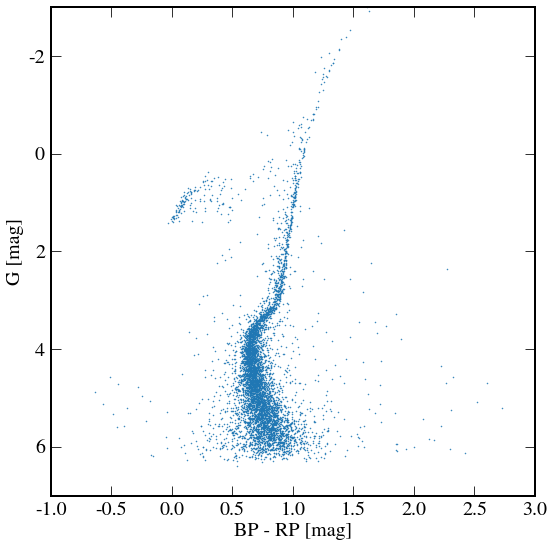

In [12]:
for j in range(13,14):
    dm = 5*np.log10((t['Dist'][j]*u.kpc/(10*u.pc)).decompose().value)
    
    tg = tgc[j]
    plt.plot(tg['bp_rp'], tg['phot_g_mean_mag']-dm, '.', ms=1)

plt.xlim(-1,3)
plt.ylim(7,-3)
plt.xlabel('BP - RP [mag]')
plt.ylabel('G [mag]')
plt.tight_layout()

In [13]:
tg = tgc[13]
N = len(tg)

In [14]:
c = coord.SkyCoord(ra=tg['ra'], dec=tg['dec'], frame='icrs')

In [15]:
ebv = sfd(c)

In [16]:
kg = np.array([0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099])
kbp = np.array([1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043])
krp = np.array([0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006])

In [17]:
a0 = 3.1*ebv

In [18]:
p = np.zeros((4,N))
bp_rp = np.zeros(N)

In [19]:
p[0] = a0 * (krp[3] - kbp[3])
p[1] = a0 * (krp[2] - kbp[2])
p[2] = a0 * (krp[1] - kbp[1]) + a0**2 * (krp[6] - kbp[6]) - 1
p[3] = a0 * (krp[0] - kbp[0]) + a0**2 * (krp[4] - kbp[4]) + a0**3 * (krp[5] - kbp[5]) + tg['bp_rp'] 

In [20]:
N, np.sum(np.isfinite(a0)), np.sum(np.isfinite(tg['bp_rp']))

(5735, 5735, 5735)

In [21]:
for i in range(N):
    r = np.roots(p[:,i])
    ind = np.argmin(np.abs(r - tg['bp_rp'][i]))
    bp_rp[i] = r[ind]

/tmp/ipykernel_16056/109251109.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  bp_rp[i] = r[ind]


In [22]:
bp_rp

array([1.53157996, 0.58941672, 0.64877696, ..., 1.03786901, 0.64920623,
       0.67566218])

In [23]:
ag = (kg[0] + kg[1]*bp_rp + kg[2]*bp_rp**2 + kg[3]*bp_rp**3 + kg[4]*a0 + kg[5]*a0**2 + kg[6]*bp_rp*a0) * a0
g = tg['phot_g_mean_mag'] - ag

In [24]:
np.sum(bp_rp<tg['bp_rp'])

5735

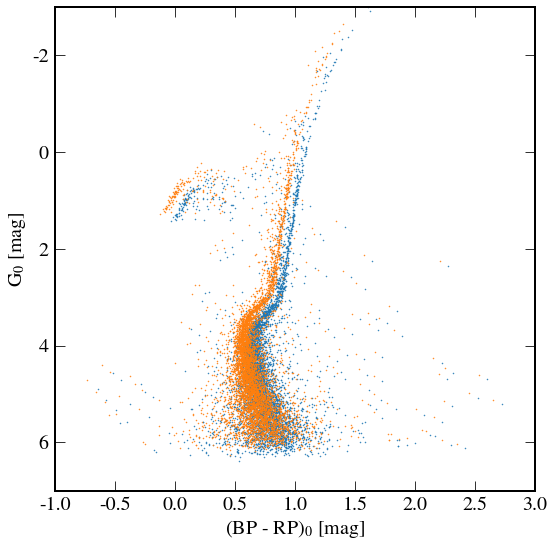

In [25]:
for j in range(13,14):
    dm = 5*np.log10((t['Dist'][j]*u.kpc/(10*u.pc)).decompose().value)
    
    tg = tgc[j]
    plt.plot(tg['bp_rp'], tg['phot_g_mean_mag']-dm, '.', ms=1)
    plt.plot(bp_rp, g-dm, '.', ms=1)

plt.xlim(-1,3)
plt.ylim(7,-3)
plt.xlabel('(BP - RP)$_0$ [mag]')
plt.ylabel('G$_0$ [mag]')
plt.tight_layout()

In [26]:
tg['bp_rp0'] = bp_rp
tg['g0'] = g

In [27]:
def deredden(t):
    # load SFD reader
    sfd = SFDQuery()
    
    # Gaia extinction coefficients from Babusiaux+2018
    kg = np.array([0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099])
    kbp = np.array([1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043])
    krp = np.array([0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006])
    
    # query dust map
    c = coord.SkyCoord(ra=t['ra'], dec=t['dec'], frame='icrs')
    ebv = sfd(c)
    a0 = 3.1*ebv
    
    # 
    N = len(t)
    p = np.zeros((4,N))
    bp_rp = np.zeros(N)
    
    p[0] = a0 * (krp[3] - kbp[3])
    p[1] = a0 * (krp[2] - kbp[2])
    p[2] = a0 * (krp[1] - kbp[1]) + a0**2 * (krp[6] - kbp[6]) - 1
    p[3] = a0 * (krp[0] - kbp[0]) + a0**2 * (krp[4] - kbp[4]) + a0**3 * (krp[5] - kbp[5]) + t['bp_rp']
    
    for i in range(N):
        r = np.roots(p[:,i])
        ind = np.argmin(np.abs(r - t['bp_rp'][i]))
        bp_rp[i] = r[ind]
    
    ag = (kg[0] + kg[1]*bp_rp + kg[2]*bp_rp**2 + kg[3]*bp_rp**3 + kg[4]*a0 + kg[5]*a0**2 + kg[6]*bp_rp*a0) * a0
    g = t['phot_g_mean_mag'] - ag
    
    t['bp_rp0'] = bp_rp
    t['g0'] = g
    

In [28]:
for i in range(14):
    print(i)
    deredden(tgc[i])

0


/tmp/ipykernel_16056/3923720646.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  bp_rp[i] = r[ind]


1
2
3
4
5
6
7
8
9
10
11
12
13


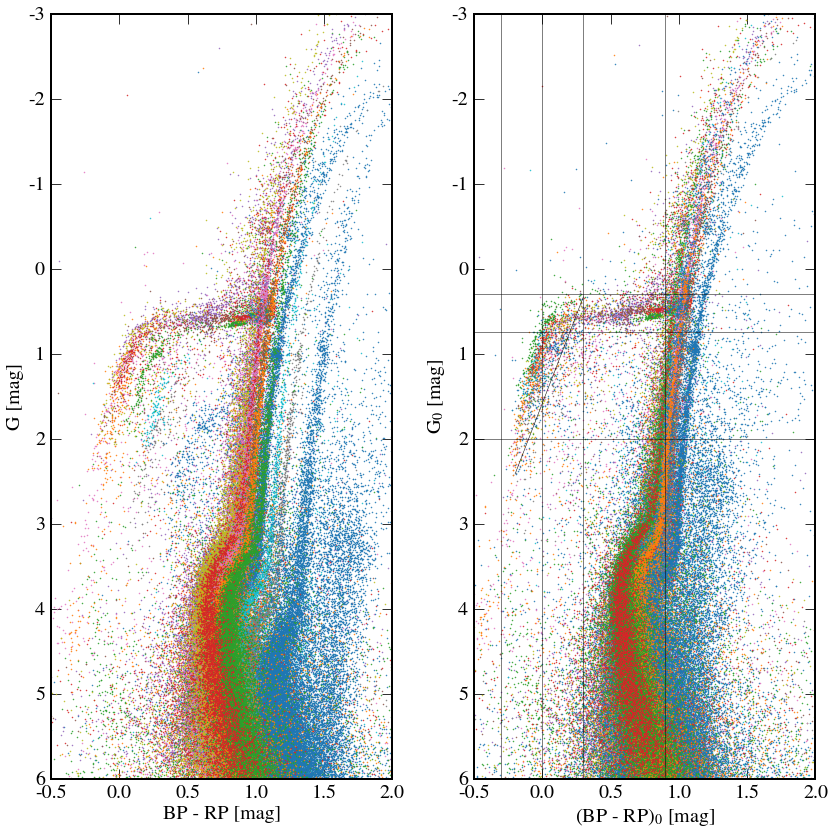

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
for j in range(14):
    dm = 5*np.log10((t['Dist'][j]*u.kpc/(10*u.pc)).decompose().value)
    
    tg = tgc[j]
    
    plt.sca(ax[0])
    plt.plot(tg['bp_rp'], tg['phot_g_mean_mag']-dm, '.', ms=1)
    
    plt.sca(ax[1])
    plt.plot(tg['bp_rp0'], tg['g0']-dm, '.', ms=1)
    tg['mg'] = tg['g0'] - dm
    tg['dm'] = np.ones(len(tg)) * dm

plt.axvline(0.3, color='k', lw=0.5)
plt.axvline(0.9, color='k', lw=0.5)
plt.axvline(-0.3, color='k', lw=0.5)
plt.axvline(0.0, color='k', lw=0.5)

plt.axhline(0.75, color='k', lw=0.5)
plt.axhline(2, color='k', lw=0.5)
plt.axhline(0.3, color='k', lw=0.5)

# line passing through (0,2) and (0.3, 0.75)
x1, y1 = -0.1,2
x2, y2 = 0.2, 0.75
a = (y2 - y1) / (x2 - x1)
b = y1 - x1*a
x = np.linspace(-0.2,0.3, 10)
y = a*x + b
plt.plot(x, y, 'k-', lw=0.5)


plt.sca(ax[0])
plt.xlim(-0.5,2)
plt.ylim(6,-3)
plt.xlabel('BP - RP [mag]')
plt.ylabel('G [mag]')

plt.sca(ax[1])
plt.xlim(-0.5,2)
plt.ylim(6,-3)
plt.xlabel('(BP - RP)$_0$ [mag]')
plt.ylabel('G$_0$ [mag]')

plt.tight_layout()

In [30]:
t_ = []
for i in range(14):
    tg = tgc[i]
    ind = (((tg['bp_rp0']<0.9) & (tg['bp_rp0']>=0.2) & (tg['mg']>0.3) & (tg['mg']<0.75)) | 
          ((tg['bp_rp0']<0.2) & (tg['bp_rp0']>-0.3) & (tg['mg']>0.3) & (tg['mg']<2) & (tg['mg']<a*tg['bp_rp0']+b)))
    
    t_ += [tg[ind]]
    print(len(tg[ind]))

37
95
318
271
464
370
219
97
226
123
286
136
228
131


In [31]:
tbhb = vstack(t_)

In [32]:
len(tbhb)

3001

/usr/local/lib64/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(


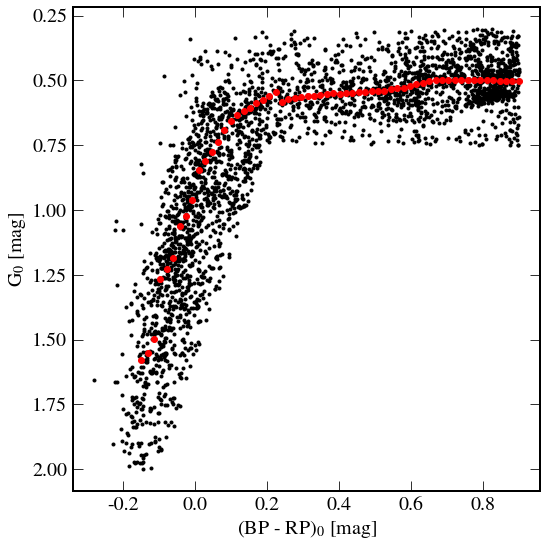

In [33]:
plt.plot(tbhb['bp_rp0'], tbhb['mg'], 'k.')

N = 60
x_ = np.linspace(-0.15, 0.9, N)
y_ = np.zeros(N)

pc = np.ones(N)*50
pc[x_<0.23] = 30
pc[x_<-0.0] = 40
pc[x_<-0.05] = 50
pc[x_<-0.1] = 70

for i in range(N):
    y_[i] = np.percentile(tbhb['mg'][np.abs(tbhb['bp_rp0']-x_[i])<0.1], pc[i])

plt.plot(x_, y_, 'ro')

plt.gca().invert_yaxis()
plt.xlabel('(BP - RP)$_0$ [mag]')
plt.ylabel('G$_0$ [mag]')

plt.tight_layout()

In [34]:
deg = 7
pbhb = np.polyfit(tbhb['bp_rp0'], tbhb['mg'], deg)

In [35]:
np.save('../data/bhb_mg', pbhb)

In [36]:
poly = np.poly1d(pbhb)
res = tbhb['mg'] - poly(tbhb['bp_rp0'])
print(np.median(res), np.std(res))

-0.001930546927165544 0.17418571480130082


/usr/local/lib64/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


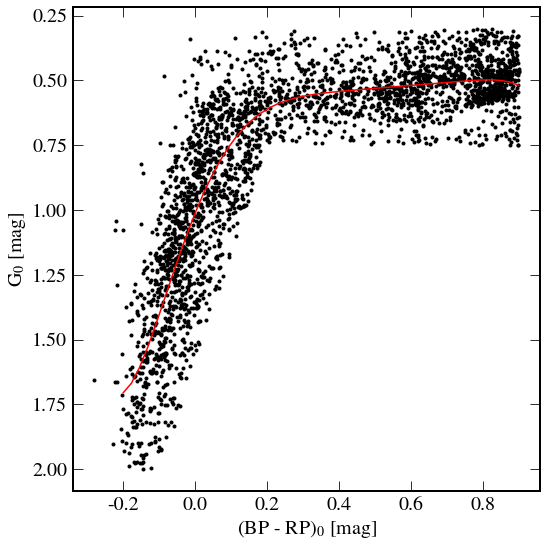

In [37]:
plt.plot(tbhb['bp_rp0'], tbhb['mg'], 'k.')

x = np.linspace(-0.2, 0.9)
y = poly(x)
plt.plot(x, y, 'r-')

plt.gca().invert_yaxis()
plt.xlabel('(BP - RP)$_0$ [mag]')
plt.ylabel('G$_0$ [mag]')

plt.tight_layout()

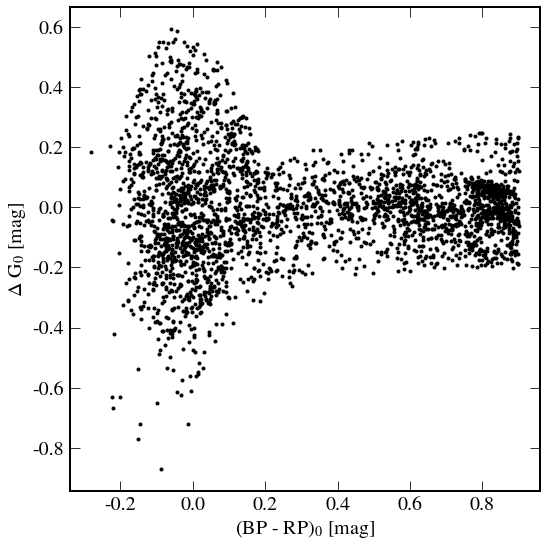

In [38]:
plt.plot(tbhb['bp_rp0'], res, 'k.')
plt.xlabel('(BP - RP)$_0$ [mag]')
plt.ylabel('$\Delta$ G$_0$ [mag]')

plt.tight_layout()

In [39]:
sig_mu = np.std(res[tbhb['bp_rp0']>0.2])
sig_mu = np.std(res)

In [40]:
err_d = 0.2*np.log(10)*sig_mu

In [41]:
print(sig_mu, err_d)

0.17418571480130082 0.08021548606279753
